# Introduction

Conventionally, if a team in the MLB wanted to guarantee as many wins in a season as possible, the management of the team would assemble a roster of the best caliber of player their respective buget could afford. Statistics that were commonly used were amount of Home Runs, Runs Batted In (RBI) and of course batting average, the proportion of the amount of hits per batting appearances. However, as of the last twenty years, due to the widening budget gaps between various teams, Billy Beane, the General Manager of the Oakland Athletics, introduced more exotic batting statistics in order to assemble the best time given their limited budget. Due to his efforts and successes, teams began to realize that statistically speaking they could afford close to the same amount of wins as another team, even though their caps were tens of millions dollars apart. This movement of management and talent recruitment was most popularly documented in Michael Lewis's book Moneyball, a documentation depicting how Billy Beane took the hopeless Oakland Athletics and turned them into a playoff caliber team in 2001, using these statistics and very little money.

I'd like to explore the effectiveness of a number of these non-conventional  batting statistics are in fact correct, assess if they are worth being considered when assembling a successful MLB team and how these statistics, popularly referred to as "Sabermetrics" , have made there way to official and normative recognition of baseball teams and their players' capacities. Although since this movement began oveer 20 years ago, many other Sabermetrics have been introduced since. For the following project I'd like to focus on the effectiveness of slugging percentage, On-Base Percentage and subsequently OPS, the sum of the slugging percentage and On Base Percentage.



Below is a master list of all player statistics from the years 1871 to 2015. This list contains all the conventional batting statistics such as AB (at bats), HR (home runs), RBI (Runs Batted In) and other useful statistics used to asses a baseball hitter's offensive prowess. We wil heavily reference to this list for the remainder of the project.

In [135]:
import pandas as pd
import numpy as np
import xlrd
df = pd.read_csv("Batting.csv")
print(df)
print(df.columns)

         playerID  yearID  stint teamID lgID    G   AB   R    H  2B  ...   \
0       abercda01    1871      1    TRO  NaN    1    4   0    0   0  ...    
1        addybo01    1871      1    RC1  NaN   25  118  30   32   6  ...    
2       allisar01    1871      1    CL1  NaN   29  137  28   40   4  ...    
3       allisdo01    1871      1    WS3  NaN   27  133  28   44  10  ...    
4       ansonca01    1871      1    RC1  NaN   25  120  29   39  11  ...    
5       armstbo01    1871      1    FW1  NaN   12   49   9   11   2  ...    
6       barkeal01    1871      1    RC1  NaN    1    4   0    1   0  ...    
7       barnero01    1871      1    BS1  NaN   31  157  66   63  10  ...    
8       barrebi01    1871      1    FW1  NaN    1    5   1    1   1  ...    
9       barrofr01    1871      1    BS1  NaN   18   86  13   13   2  ...    
10       bassjo01    1871      1    CL1  NaN   22   89  18   27   1  ...    
11      battijo01    1871      1    CL1  NaN    1    3   0    0   0  ...    

df1 contains a list of every basebal teams collective statistics from 1871 to 2015. They contain the amount of a team's wins and losses over the course of individualyears in addition to collective batting statistics similar to the ones mentioned in the earlier column.

In [136]:
df1 = pd.read_csv("Teams.csv")


In [137]:
#calculate teams batting average - is it a guarantee for teams success?
df1["team_batavg"]=df1.H/df1.AB

# Overview of New Statistics


After collecting the master list of every MLB teams' record, as well as every players' batting record, in addition to each player's batting average (Hits per At Bats) I added a number of Sabermetric statistics to this master list in order to evaluate players' performances.
These statistics include

(1) Slugging Percentage is a popular measure of the power of a hitter. It is calculated as total bases divided by at bats: where AB is the number of at-bats for a given player, and 1B, 2B, 3B, and HR are the number of singles, doubles, triples, and home runs, respectively.

(2) On Base Percentage is a statistic generally measuring how frequently a batter reaches base. As opposed to batting average which was ordinarily used to assess a single player's batting abilities, batting average neglected the total number of ways a player can reach first base, whether it be a walk or hit by a pitch.

(3)  On-base plus slugging, or OPS, is a baseball statistic which is calculated as the sum of a player's on-base percentage and slugging percentage. Both the ability of a player to get on base and to hit for power, two important hitting skills, are represented, making it an effective way of measuring the offensive worth of a player. An OPS of about .900 or higher in Major League Baseball puts the player in the upper sector of offensive ability. Usually, the league leader in OPS will score near, and not necessarily below, the 1.000 mark.

As mentioned, the reason why statisticians find these statistics more effective is because they take into account every players
 offensive contribution to a team. As opposed to batting average and other statistics describing a player's hitting abilities, the statistics mentioned above effectively describe the total amount of times a batter would find himself on base or in scoring position by means that are not usually calculated in personal batting statistics, such as walks or hit by pitches.  The obvious fiscal advantage is that although a player's regular batting statistics may not seem as impressive or marketable as their more talented colleagues, if they have a high slugging percentage, OBP and subsequently OPS, although they may not be selected for the All Star team, they can still be deemed as a valubale asset to any baseball team for a dramatically reduced price.

In [138]:
df["avg."]=df.H/df.AB
#teams collective OBP, SBP, OPS
df["OBP"]= (df.H + df.BB + df.HBP ) / (df.AB + df.BB + df.HBP + df.SF)
df1["OBP"]= (df1.H + df1.BB + df1.HBP ) / (df1.AB + df1.BB + df1.HBP + df1.SF)
df["1B"]= (df.H-df.HR-df["3B"]-df["2B"])
df1["1B"]= (df1.H-df1.HR-df1["3B"]-df1["2B"])
df["slug"]=(df["1B"] + 2*df["2B"] + df["3B"]*3 + 4*df.HR)/df.AB
df1["slug"]=(df1["1B"] + 2*df1["2B"] + df1["3B"]*3 + 4*df1.HR)/df1.AB
df["OPS"] = df.OBP + df.slug
df1["OPS"] = df1.OBP + df1.slug


Consistenly throughout this Capstone, every set of statistics I have referenced to, whether it be team statistics or player statistics, have all been taken from between the years 1980 and 2015 (unless indicated otherwise)

In [139]:
#sample selection
yrrange = df1[df1['yearID'].between(1980, 2015)]

The top 100 collective batting averages of teams from 1980 to 2015 have been documented in the dataframe labeled "p4"

In [140]:
p4 = yrrange.sort_values(('team_batavg') ,ascending=False)
p4 = p4.head(100)
print(p4)

      yearID lgID teamID franchID divID  Rank    G  Ghome    W   L    ...     \
2334    2000   NL    COL      COL     W     4  162   81.0   82  80    ...      
2216    1996   AL    CLE      CLE     C     1  161   80.0   99  62    ...      
2323    1999   AL    TEX      TEX     W     1  162   81.0   95  67    ...      
2364    2001   NL    COL      COL     W     5  162   81.0   73  89    ...      
2240    1997   AL    BOS      BOS     E     4  162   81.0   78  84    ...      
2274    1998   NL    COL      COL     W     4  162   81.0   77  85    ...      
2188    1995   AL    CLE      CLE     C     1  144   72.0  100  44    ...      
2170    1994   AL    NYA      NYY     E     1  113   57.0   70  43    ...      
2552    2007   AL    NYA      NYY     E     2  162   81.0   94  68    ...      
2160    1994   AL    CLE      CLE     C     2  113   51.0   66  47    ...      
2303    1999   AL    CLE      CLE     C     1  162   81.0   97  65    ...      
2419    2003   AL    BOS      BOS     E 

The obvious and best measure of assessing a teams's success in the regular season is their winning percentage. This can be found by dividing the number of wins by games played. This will be represented by "avg." as soon to see. As mentioned before we will assesing teams between he years 1980 and 2015. This will be followed by a list of the top teams winning percentages ranked from highest to lowest (p5) followed by the top 100 teams' winning percentages from between those periods (p6).

In [141]:
df1["avg."]=df1.W/df1.G
yrrange = df1[df1['yearID'].between(1980, 2015)]
p5 = yrrange.sort_values('avg.',ascending=False)

In [142]:
p6 =p5.head(100)
#the top 100 player batting averages of teams from 1980 to 2015 have been documented in the dataframe labeled "p6"

In [143]:
p6[["yearID", "teamID", "W", "L", "team_batavg", "avg.", "slug", "OBP", "OPS"]]

,yearID,teamID,W,L,team_batavg,avg.,slug,OBP,OPS
2379,2001,SEA,116,46,0.288204,0.716049,0.445423,0.359944,0.805367
2283,1998,NYA,114,48,0.287967,0.703704,0.460393,NaN,NaN
2188,1995,CLE,100,44,0.290573,0.694444,0.478719,NaN,NaN
1959,1986,NYN,108,54,0.263044,0.666667,0.401044,NaN,NaN
2267,1998,ATL,106,56,0.271517,0.654321,0.452772,NaN,NaN
2169,1994,MON,74,40,0.277750,0.649123,0.435250,NaN,NaN
2471,2004,SLN,105,57,0.277948,0.648148,0.459586,0.344312,0.803898
2012,1988,OAK,104,58,0.263120,0.641975,0.399322,NaN,NaN
2125,1993,ATL,104,58,0.261831,0.641975,0.407616,NaN,NaN
1899,1984,DET,104,58,0.270907,0.641975,0.431609,NaN,NaN


# Evaluating Batting Average
This scatterplot displayed above is an attempt to convey the correlation between the top 100 team batting averages and the top 100 winning percentages. It seems from this plot, that there is a very close correlation between a teams success and a teams batting average, however I would have expected a higher correlation. Given that batting average is a just representation of a team's performance, I would have assumed that the correlaton would have been proportional; similar to the results shown above.

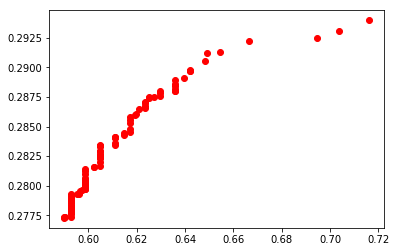

In [144]:
import matplotlib.pyplot as plt
plt.plot(p6['avg.'], p4['team_batavg'], 'ro')
plt.show()

It seems that there is a proportional relationship between the team average and the team's winning percentage.

In [145]:
import functools
sp = functools.reduce(lambda x,y: x.merge(y,on=['yearID', 'teamID']), [p4, p6])
print(sp)

    yearID lgID_x teamID franchID_x divID_x  Rank_x  G_x  Ghome_x  W_x  L_x  \
0     1996     AL    CLE        CLE       C       1  161     80.0   99   62   
1     1995     AL    CLE        CLE       C       1  144     72.0  100   44   
2     1994     AL    NYA        NYY       E       1  113     57.0   70   43   
3     1999     AL    CLE        CLE       C       1  162     81.0   97   65   
4     2001     AL    SEA        SEA       W       1  162     81.0  116   46   
5     1998     AL    NYA        NYY       E       1  162     81.0  114   48   
6     1994     AL    CHA        CHW       C       1  113     53.0   67   46   
7     2006     AL    MIN        MIN       C       1  162     81.0   96   66   
8     1997     AL    NYA        NYY       E       2  162     80.0   96   66   
9     1980     AL    KCA        KCR       W       1  162     81.0   97   65   
10    2009     AL    LAA        ANA       W       1  162     81.0   97   65   
11    2006     AL    NYA        NYY       E       1 

In [146]:
p6[["yearID", "teamID", "W", "L", "team_batavg", "avg."]]

,yearID,teamID,W,L,team_batavg,avg.
2379,2001,SEA,116,46,0.288204,0.716049
2283,1998,NYA,114,48,0.287967,0.703704
2188,1995,CLE,100,44,0.290573,0.694444
1959,1986,NYN,108,54,0.263044,0.666667
2267,1998,ATL,106,56,0.271517,0.654321
2169,1994,MON,74,40,0.277750,0.649123
2471,2004,SLN,105,57,0.277948,0.648148
2012,1988,OAK,104,58,0.263120,0.641975
2125,1993,ATL,104,58,0.261831,0.641975
1899,1984,DET,104,58,0.270907,0.641975


In [147]:
len(sp)

26

With closer examination, the quantitative overlap between the top 100 teams and the teams with the top 100 batting averages is relatively smaller than one have expected. Above is a merge function, collecting all the overlapping teams that can be found in p4 and p6. Below is a venn diagram displaying our results.

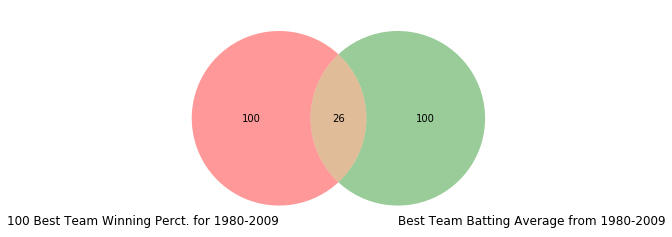

In [148]:
import pylab as plt
from matplotlib_venn import venn2, venn2_circles

venn2(subsets = (100, 100, len(sp)), set_labels = ('100 Best Team Winning Perct. for 1980-2009', 'Best Team Batting Average from 1980-2009'))
plt.show()


Although there was very covincing evidence that there is a relationship between the teams winning percentage and the team's batting average, the number of teams that were shared between these two lists was slightly disappointing. I would have assumed, just like the scatterplot; the higher the batting average, the higher winning percentage. However, after all is said and done only 26 teams fit this criteria, demanding further investigation to what is the best statistic that we can find to produce wins?



# Analyzing Slugging Percentage, OBP and OPS
After exploring bating averages, I'd  like to assess other, more non-conventional statistics that were mentioned above (slugging percentage, on base percentage and OBP) to see whether these statistics guarantee more runs. p10, p11, p12 are different lists accumulating the teams that succeded in the statistics mentioned above, while top100slug, top100obp and top100ops are used to list the top 100 teams that suceeded in all those categories from the years 1980-2015.

In [149]:
p10 = yrrange.sort_values('slug',ascending=False)
print(p10)

p11 = yrrange.sort_values('OBP',ascending=False)
print(p11)

p12 = yrrange.sort_values('OPS',ascending=False)
print(p12)

      yearID lgID teamID franchID divID  Rank    G  Ghome    W    L    ...     \
2419    2003   AL    BOS      BOS     E     2  162   81.0   95   67    ...      
2260    1997   AL    SEA      SEA     W     1  162   81.0   90   72    ...      
2160    1994   AL    CLE      CLE     C     2  113   51.0   66   47    ...      
2232    1996   AL    SEA      SEA     W     2  161   81.0   85   76    ...      
2364    2001   NL    COL      COL     W     5  162   81.0   73   89    ...      
2188    1995   AL    CLE      CLE     C     1  144   72.0  100   44    ...      
2323    1999   AL    TEX      TEX     W     1  162   81.0   95   67    ...      
2245    1997   NL    COL      COL     W     3  162   81.0   83   79    ...      
2612    2009   AL    NYA      NYY     E     1  162   81.0  103   59    ...      
2337    2000   NL    HOU      HOU     C     4  162   81.0   72   90    ...      
2417    2003   NL    ATL      ATL     E     1  162   81.0  101   61    ...      
2216    1996   AL    CLE    

      yearID lgID teamID franchID divID  Rank    G  Ghome    W   L    ...     \
2419    2003   AL    BOS      BOS     E     2  162   81.0   95  67    ...      
2612    2009   AL    NYA      NYY     E     1  162   81.0  103  59    ...      
2337    2000   NL    HOU      HOU     C     4  162   81.0   72  90    ...      
2333    2000   AL    CLE      CLE     C     2  162   81.0   90  72    ...      
2364    2001   NL    COL      COL     W     5  162   81.0   73  89    ...      
2350    2000   NL    SFN      SFG     W     1  162   81.0   97  65    ...      
2449    2004   AL    BOS      BOS     E     2  162   81.0   98  64    ...      
2552    2007   AL    NYA      NYY     E     2  162   81.0   94  68    ...      
2330    2000   AL    CHA      CHW     C     1  162   81.0   95  67    ...      
2325    2000   AL    ANA      ANA     W     3  162   81.0   82  80    ...      
2417    2003   NL    ATL      ATL     E     1  162   81.0  101  61    ...      
2522    2006   AL    NYA      NYY     E 

# Evaluating OPS
(for the remainder we will be using OPS, the sum of slugging percentage and OBP)

In [150]:
top100slug= p10.head(100)
top100obp= p11.head(100)
top100ops= p12.head(100)

In [151]:
print(top100ops)

      yearID lgID teamID franchID divID  Rank    G  Ghome    W   L    ...     \
2419    2003   AL    BOS      BOS     E     2  162   81.0   95  67    ...      
2612    2009   AL    NYA      NYY     E     1  162   81.0  103  59    ...      
2337    2000   NL    HOU      HOU     C     4  162   81.0   72  90    ...      
2333    2000   AL    CLE      CLE     C     2  162   81.0   90  72    ...      
2364    2001   NL    COL      COL     W     5  162   81.0   73  89    ...      
2350    2000   NL    SFN      SFG     W     1  162   81.0   97  65    ...      
2449    2004   AL    BOS      BOS     E     2  162   81.0   98  64    ...      
2552    2007   AL    NYA      NYY     E     2  162   81.0   94  68    ...      
2330    2000   AL    CHA      CHW     C     1  162   81.0   95  67    ...      
2325    2000   AL    ANA      ANA     W     3  162   81.0   82  80    ...      
2417    2003   NL    ATL      ATL     E     1  162   81.0  101  61    ...      
2522    2006   AL    NYA      NYY     E 

In [152]:
import functools
sp2 = functools.reduce(lambda x,y: x.merge(y,on=['yearID', 'teamID']), [top100ops, p6])

With OPS being the sum of slugging percentage and OBP, similar to what we did before I wanted to see what was the overlap between the top 100 winning teams and the top 100 teams' OBP.

In [153]:
len(sp2)

19

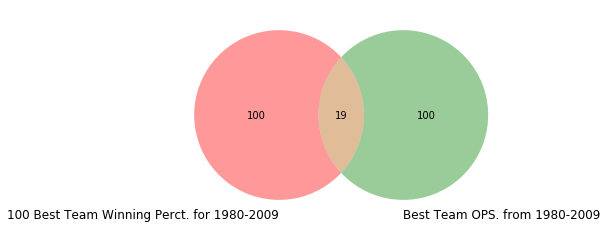

In [154]:
venn2(subsets = (100, 100, len(sp2)), set_labels = ('100 Best Team Winning Perct. for 1980-2009', 'Best Team OPS. from 1980-2009'))
plt.show()

Disappointingly, we were left with a number less than the one mentioned in the overlap function earlier, leaving us with less evidence of a relationship between OPS and team winning percentage, that existed between batting average and team winning percentage.

As we did earlier, a plot graph is a great way of indicating if there is a relationship between the two sets of data. Previously we described the proportional relationship between teams batting average and winning percentage. Can we detect such a relationship between teams' winning percentage and OPS,OBP or Slugging Percentage?

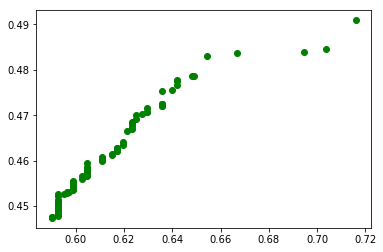

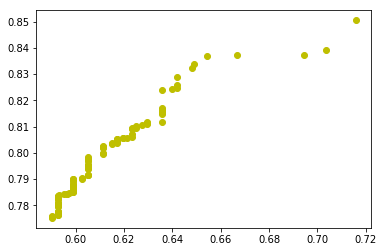

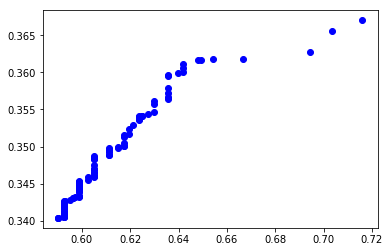

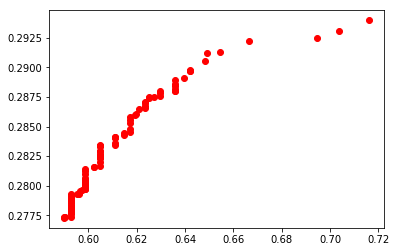

In [155]:


plt.plot(p6['avg.'], top100slug['slug'], 'go', label= "Slugging Percentage")
plt.show()

plt.plot(p6['avg.'], top100ops['OPS'], 'yo')
plt.show()

plt.plot(p6['avg.'], top100obp['OBP'], 'bo')
plt.show()

plt.plot(p6['avg.'], p4['team_batavg'], 'ro')
plt.show()

To prove our point there is no evidence conveyed through these scatter plots that indicate a stronger relationship between slugging percentage, OPS and OBP that exist between batting average and winning percentage.

# Is League MVP Indicative

Another test I want to perform is the following. Every year there is a vote amongst baseball's best professional analysts and writers to consider who is the most valubale player on a given team; which team's success can be attributed to a certain player's efforts. Historically, there has been a vote for the American League and the National League. I want to explore whether there is a correlating relationship between the league's MVP and their batting average and OPS. To put it most clearly, do league experts consider OPS as a statsitics worth considering a player for MVP, and if they do when did this trend begin?

As one baseball expert put it ("Do MVP Voters Look at Some Stats Above Others?" Spera, Andrew, September 8, 2017, https://www.fangraphs.com/community/do-mvp-voters-look-at-some-stats-above-others) ..."the two statistics that seem to have the greatest impact on MVP voting are On-Base Percentage (OBP) and Slugging Percentage (SLG)."

We begin by collecting all of baseball's award winners between 1980 and 2015.This includes awards in both offense, defense and pitcing.  We then narrow it down specificallly to MVP winners. Given that there were a number of MVP who were pitchers (and were chosen as MVP because of their pitching prowess), we eliminate them from analysis by imposing a minimum batting average of .200, easily eliminating pitchers whose average is found way below that.



In [156]:
df3 = pd.read_csv("AwardsPlayers.csv")
yrrange3 = df3[df3['yearID'].between(1980, 2015)]

In [157]:
#find all mvp winners from 1980 to 2010 and compare mvp winners BA to best player BA and RBI and OBP from 1980 to 2010
#best player RBI stats and best OBP stats- are sabermetrics being considered for award recognization?

mvps= yrrange3[yrrange3['awardID']=='Most Valuable Player']
print(mvps)
len(mvps)

#then time line/scatter plot top 100 players overtime with obp to mvps
#the same can be said for cy young, compare top 100 eras to cy youngs eras and top pwarps

       playerID               awardID  yearID lgID  tie notes
3382  brettge01  Most Valuable Player    1980   AL  NaN   NaN
3383  schmimi01  Most Valuable Player    1980   NL  NaN   NaN
3462  fingero01  Most Valuable Player    1981   AL  NaN   NaN
3463  schmimi01  Most Valuable Player    1981   NL  NaN   NaN
3544  yountro01  Most Valuable Player    1982   AL  NaN   NaN
3545  murphda05  Most Valuable Player    1982   NL  NaN   NaN
3624  ripkeca01  Most Valuable Player    1983   AL  NaN   NaN
3625  murphda05  Most Valuable Player    1983   NL  NaN   NaN
3705  hernawi01  Most Valuable Player    1984   AL  NaN   NaN
3706  sandbry01  Most Valuable Player    1984   NL  NaN   NaN
3786  mattido01  Most Valuable Player    1985   AL  NaN   NaN
3787  mcgeewi01  Most Valuable Player    1985   NL  NaN   NaN
3867  clemero02  Most Valuable Player    1986   AL  NaN   NaN
3868  schmimi01  Most Valuable Player    1986   NL  NaN   NaN
3947   bellge02  Most Valuable Player    1987   AL  NaN   NaN
3948  da

72

 As explained above, in the following function we are trying to accomplish two things. First, we will attain all the MVP's statistics by merging it with df, the dataframe that contains all the players' batting statistics. Once we have all of the MVPs' statistics, we can begin to detect any trends.
 
 Next, we will perform a technical function by narrowing down the list only to batters and not pitchers by imposing that the minimum batting average of .200. This is confirmed by the len function, that even though we are dealing with 36 years of baseball, which should result in 72 MVPs, after narrowing the list down we are left with a length of 66 dismissing any pitchers from our list.

In [158]:
import functools
sp3 = functools.reduce(lambda x,y: x.merge(y,on=['yearID', 'playerID']), [df, mvps])
sp3 = sp3[sp3['avg.'] > .200]
print(sp3)


     playerID  yearID  stint teamID lgID_x    G   AB    R    H  2B  ...    \
0   brettge01    1980      1    KCA     AL  117  449   87  175  33  ...     
1   schmimi01    1980      1    PHI     NL  150  548  104  157  25  ...     
3   schmimi01    1981      1    PHI     NL  102  354   78  112  19  ...     
4   murphda05    1982      1    ATL     NL  162  598  113  168  23  ...     
5   yountro01    1982      1    ML4     AL  156  635  129  210  46  ...     
6   murphda05    1983      1    ATL     NL  162  589  131  178  24  ...     
7   ripkeca01    1983      1    BAL     AL  162  663  121  211  47  ...     
9   sandbry01    1984      1    CHN     NL  156  636  114  200  36  ...     
10  mattido01    1985      1    NYA     AL  159  652  107  211  48  ...     
11  mcgeewi01    1985      1    SLN     NL  152  612  114  216  26  ...     
13  schmimi01    1986      1    PHI     NL  160  552   97  160  29  ...     
14   bellge02    1987      1    TOR     AL  156  610  111  188  32  ...     

In [159]:
len(sp3)

66

Given we have collected all the MVPs that were selected for their batting abilities, it is now worthwhile to see if MVP winners were considered for a specific statistic. Below we have displayed the MVPs' batting statistics divided up by their league in order to avoid a compunded sample.

In [160]:
sp31= sp3[sp3['lgID_x'] == 'AL']
sp32= sp3[sp3['lgID_x'] == 'NL']
print(sp31)

     playerID  yearID  stint teamID lgID_x    G   AB    R    H  2B  ...    \
0   brettge01    1980      1    KCA     AL  117  449   87  175  33  ...     
5   yountro01    1982      1    ML4     AL  156  635  129  210  46  ...     
7   ripkeca01    1983      1    BAL     AL  162  663  121  211  47  ...     
10  mattido01    1985      1    NYA     AL  159  652  107  211  48  ...     
14   bellge02    1987      1    TOR     AL  156  610  111  188  32  ...     
16  cansejo01    1988      1    OAK     AL  158  610  120  187  34  ...     
19  yountro01    1989      1    ML4     AL  160  614  101  195  38  ...     
21  henderi01    1990      1    OAK     AL  136  489  119  159  33  ...     
23  ripkeca01    1991      1    BAL     AL  162  650   99  210  46  ...     
27  thomafr04    1993      1    CHA     AL  153  549  106  174  36  ...     
29  thomafr04    1994      1    CHA     AL  113  399  106  141  34  ...     
31  vaughmo01    1995      1    BOS     AL  140  550   98  165  28  ...     

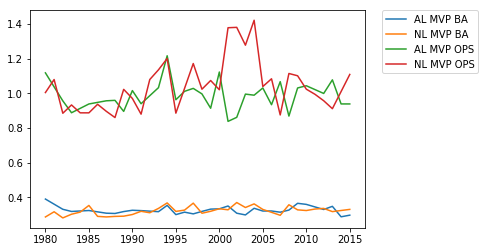

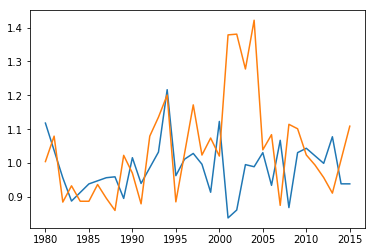

In [167]:
plt.plot(sp31['yearID'], sp31['avg.'], label= "AL MVP BA")
plt.plot(sp32['yearID'], sp32['avg.'], label= "NL MVP BA")
plt.plot(sp31['yearID'], sp31['OPS'], label ="AL MVP OPS")
plt.plot(sp32['yearID'], sp32['OPS'], label= "NL MVP OPS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(sp31['yearID'], sp31['OPS'], label ="AL MVP OPS")
plt.plot(sp32['yearID'], sp32['OPS'], label= "NL MVP OPS")
plt.show()



As depicted above, although the batting average for the league MVPs remained pretty consistent overtime, the leagues MVPs' OPSs were not stable at all, It seems after the year 2000 till 2005 there was a spiked increase in NL MVPs OPS event though there batting averages remained pretty consistent from the previous years. 

One explanation to this phenomenon is that once the Oakland Athletics thrived using OPS, therefore league experts placed more consideration on OPS in contrast to the years before. However, the same league officials were voting on AL MVP as well as  seen above there was no consideration for OPS. In fact those years had the worst OPS statistics in the AL over the 36 year span and nonetheless these players were awarded the MVP awards!

Additionally, the years following this craze do not support this thesis. After 2006 when the OPS numbers sank in the NL, MVPs with low OPS numbers (in comparative to former MVPs) were still awarded MVP!

Lastly, the NL MVP over the course of those years was consistently Barry Bonds, one of the most prolific hitters to ever play the game. Although his numbers were astronomical and some of the best the game has ever seen, nonetheless his numbers are tainted, as is well known and recorded, by performance enhancing steroids thus attributing his numbers to artificial boosters as opposed to solely his own raw, natural talent. This is especially conveyed by his record number of home runs, siginificantly increasing his sluggig percentage.

In an attempt to salvage the data recorded above, it may be worth our while to investigate whether there is a significant divergence between attention paid to the league's MVPs and the OPS of the leagues MVPs. Although, as explained above, the OPS numbers alone may not be the best way of getting in the mind of a league expert, however we may still able to glean a trend by evaluating if there is a widening gap between the MVP's OPS over time. If the gap widens from before a certain between two periods in time, this supports our hypothesis that OPS is being more heavily considered in recent years. If the gap is not so significant, it does not indicate there is being more attention given to OPS.

For the remainder of the project we will refer to "sp3" as opposed to "sp31" or "sp32" in order to deduce if there is any relationship between batting average and OPS.


In [162]:
sp3["avg./OPS"] = sp3["avg."]/sp3.OPS
sp3[['yearID', 'playerID', 'avg.', 'slug', 'OBP', 'OPS', 'avg./OPS']].describe()

,yearID,avg.,slug,OBP,OPS,avg./OPS
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1997.757576,0.323554,0.604561,0.412110,1.016670,0.321203
std,10.148225,0.023296,0.080174,0.052020,0.125371,0.031771
min,1980.000000,0.280936,0.456647,0.327795,0.838119,0.237744
25%,1989.250000,0.308167,0.558530,0.376918,0.934921,0.298151
50%,1998.000000,0.320804,0.599652,0.394711,1.001839,0.318513
75%,2006.000000,0.333759,0.644722,0.440396,1.076804,0.343952
max,2015.000000,0.389755,0.863445,0.609400,1.421733,0.417257


Since we are trying to a analyze a relatively recent trend, we must begin by analyzing our data in different time frame. Since the introduction of these statistics really took off at the begginning of the 2000s therefore its most approporiate to divide the data from pre-2000 to post-2000 (2000 included). I think this is the best way of deciphiring any relationship between the trends in OPS. If these is a significant difference between these two time ranges, it is surely indicative that league experts did place more emphasis on OPS as time progressed.

In order to most appropriately compare these time periods we will need to run a t-test and a p-test in order to answer out questions.

In [163]:
sample1= sp3[sp3.yearID < 2000]["OPS"]
sample2= sp3[sp3.yearID >= 2000]["OPS"]


In [164]:


print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

0.9909337667828706
1.0475536419401326
0.09554724514551487
0.14967496399653218
0.05661987515726197


In [165]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

1.7901696346452682


In [166]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=1.7901696346452682, pvalue=0.07980144847967839)


The t-value scales the difference between the two groups by the amount of variance in the two samples. High variability in samples can lead to groups with means that look very different. Obviously the numbers in both eras can resemble each other, however it behooves to determine whether there was a more focused attention given to OPS post 2000 as opposed to pre 2000.

One way to interpret a t-value is as the number of standard errors worth of space separating the group means.  Since we have a t-value of 1.7, it implies that these two sets are 1.7 standard deviations apart from one another. Although there is a difference between the two, a score of 1.7 is not completely telling.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different. The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations. The p-value above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population, with more sample being taken from before 200 than after 2000, and not due to variability in the samples.

# Conclusion

To conclude we began our project inquiring whether new Sabermetrics, most specifically OPS, were effective in determining a team's success. We began by mentioning the success that Oakland A's had using this system so I thought to test if these numbers held up.

We began by investigating the role of batting average to a team's success. We were shown how batting average results and teams’ winning percentages were very related. However, when it came to OPS there was no such evidence, whether visual or statistical, that a team's collective OPS can create more wins.

Secondly, we endeavored to see if the leagues experts' selection of MVP placed an emphasis on OPS as opposed to Batting Average. At first glance we were enlightened to see that although batting averages for MVPs has been constant for the past 35 years, however OPS numbers for MVPs have jumped mightily around the time of the Oakland Athletics’ resurgence/ introduction of Sabermetrics in Baseball. Nonetheless, we refuted this thesis with many problems, such as the neglect of attention to AL MVP's OPS numbers, the consistency of attention to OPS following this era and Barry Bond's reign as league's Most Valuable Player for those years.

Lastly, we attempted to revive the MVPs' numbers by trying to see if there was a considerable gap in OPS numbers to MVPs before the year 2000 and after the year 2000. We were given a number of 1.7 a significant but not over revealing indicator of a relationship.

To conclude, the numbers seem to disprove the importance of OPS when trying to compose the best team under the most fiscally responsible measures. To be fair, we consistently used batting average as a comparison in relation to the Sabermetrics discussed. I chose to use Batting Average because it is one of the best statistics in assessing a player's offensive prowess and subsequently a team's success. Additionally, I did not include other very important Sabermetrics such as WAR (Wins Above Replacement) and defensive statistics which has also heavily been used to create affordable teams. But after all is said and done there are many other factors that can propel a team to success such as ballpark size and the like.

As an epilogue, the Athletics could not sustain their success relying on Sabermetrics and have not had such a winning season since. Although their approach was a novel one, they will have to look for another approach in assembling a team under affordable means. However it should be noted that Sabermetrics has created a revolution in a variety of disciplines, from business, to mathematics to the sciences and much more.